# Karate Club

/var/folders/w4/dj_p7yxd4fn49p3ldny5zzsw0000gn/T/ipykernel_15446/970342952.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


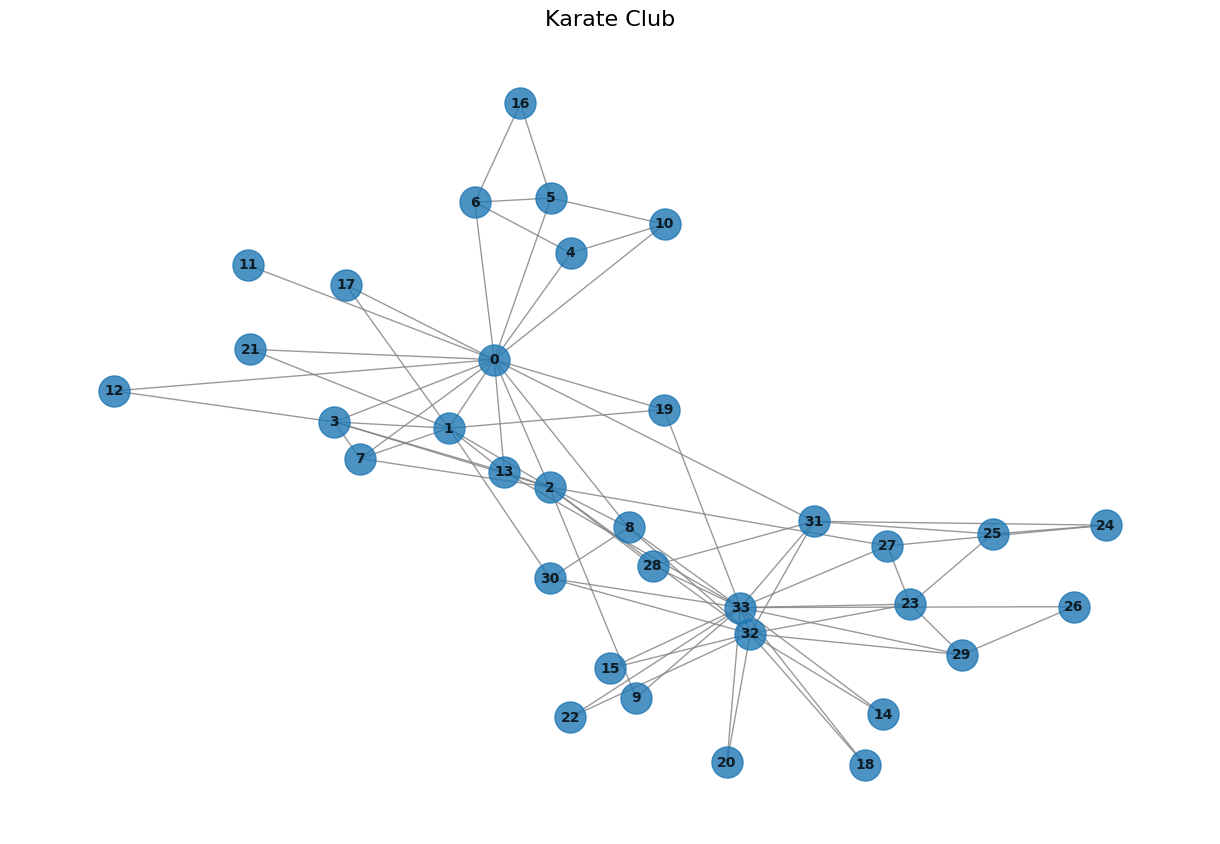

In [18]:
import networkx as nx

G = nx.karate_club_graph()

# Visualización de comunidades con Greedy Modularity
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

# Draw the graph with community colors
nx.draw(G, pos, 
        with_labels=True,
        node_size=500,
        cmap=plt.cm.Set3,
        edge_color="gray",
        alpha=0.8,
        font_size=10,
        font_weight='bold')

plt.title("Karate Club", fontsize=16)
plt.tight_layout()
plt.show()

Number of communities: 2
Communities: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


/var/folders/w4/dj_p7yxd4fn49p3ldny5zzsw0000gn/T/ipykernel_15446/1521626042.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


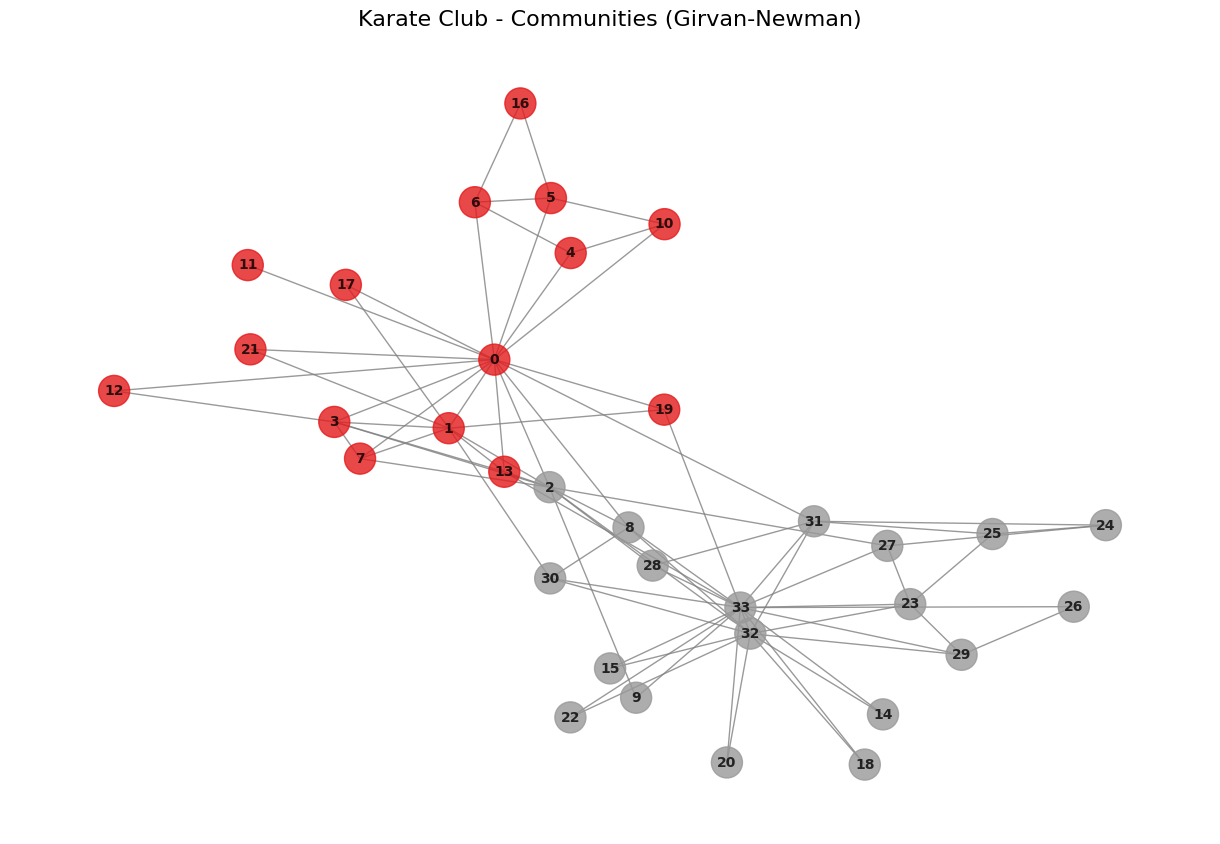

In [19]:
import networkx as nx
from networkx.algorithms.community import girvan_newman

# Crear un grafo de ejemplo
G = nx.karate_club_graph()

# Generador de particiones jerárquicas
comp = girvan_newman(G)

# Obtener la primera partición (dos comunidades)
first_level = next(comp)
comunidades = [list(c) for c in first_level]

print(f"Number of communities: {len(comunidades)}")
print(f"Communities: {comunidades}")

# Visualización de comunidades con Girvan-Newman
import matplotlib.pyplot as plt

# Create color map for nodes
color_map = []
for node in G.nodes():
    for i, comm in enumerate(comunidades):
        if node in comm:
            color_map.append(i)
            break

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Same layout as before

# Draw the graph with community colors
nx.draw(
    G,
    pos,
    node_color=color_map,
    with_labels=True,
    node_size=500,
    cmap=plt.cm.Set1,
    edge_color="gray",
    alpha=0.8,
    font_size=10,
    font_weight="bold",
)

plt.title("Karate Club - Communities (Girvan-Newman)", fontsize=16)
plt.tight_layout()
plt.show()